### Conditional Probability
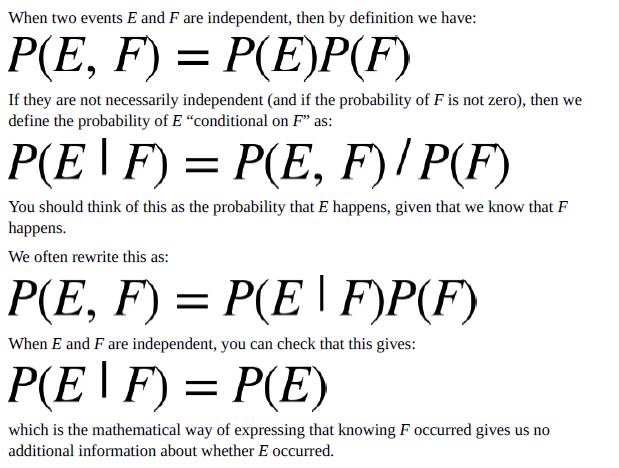

One common tricky example involves a family with two (unknown) children.
If we assume that:
1. Each child is equally likely to be a boy or a girl
2. The gender of the second child is independent of the gender of the first child
then the event “no girls” has probability 1/4, the event “one girl, one boy” has probability
1/2, and the event “two girls” has probability 1/4.

Now we can ask what is the probability of the event “both children are girls” (B)
conditional on the event “the older child is a girl” (G)? Using the definition of conditional
probability:
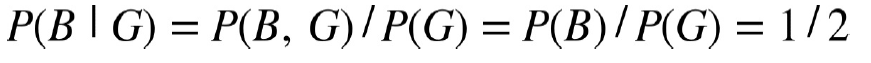

since the event B and G (“both children are girls and the older child is a girl”) is just the
event B. (Once you know that both children are girls, it’s necessarily true that the older
child is a girl.)
Most likely this result accords with your intuition.
We could also ask about the probability of the event “both children are girls” conditional
on the event “at least one of the children is a girl” (L). Surprisingly, the answer is different
from before!
As before, the event B and L (“both children are girls and at least one of the children is a
girl”) is just the event B. This means we have:
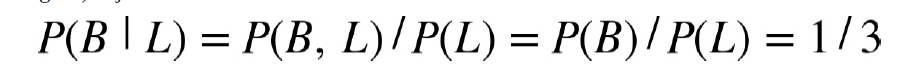
How can this be the case? Well, if all you know is that at least one of the children is a girl,
then it is twice as likely that the family has one boy and one girl than that it has both girls.
We can check this by “generating” a lot of families:

In [2]:
import random
def random_kid():
    return random.choice(["boy", "girl"])
both_girls = 0
older_girl = 0
either_girl = 0
random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == "girl":
        older_girl += 1
    if older == "girl" and younger == "girl":
        both_girls += 1
    if older == "girl" or younger == "girl":
        either_girl += 1
print("P(both | older):", both_girls / older_girl) 
print("P(both | either): ", both_girls / either_girl)

P(both | older): 0.5007089325501317
P(both | either):  0.3311897106109325


### Bayes Theorem 
One of the data scientist’s best friends is Bayes’s Theorem, which is a way of “reversing”
conditional probabilities. Let’s say we need to know the probability of some event E
conditional on some other event F occurring. But we only have information about the
probability of F conditional on E occurring. Using the definition of conditional probability
twice tells us that:
![image.png](attachment:image.png)
The event F can be split into the two mutually exclusive events “F and E” and “F and not
E.” If we write ![image-3.png](attachment:image-3.png) for “not E” (i.e., “E doesn’t happen”), then:
![image-2.png](attachment:image-2.png)
so that:
![image-4.png](attachment:image-4.png)
which is how Bayes’s Theorem is often stated.
This theorem often gets used to demonstrate why data scientists are smarter than doctors.
Imagine a certain disease that affects 1 in every 10,000 people. And imagine that there is a
test for this disease that gives the correct result (“diseased” if you have the disease,
“nondiseased” if you don’t) 99% of the time.
What does a positive test mean? Let’s use T for the event “your test is positive” and D for
the event “you have the disease.” Then Bayes’s Theorem says that the probability that you
have the disease, conditional on testing positive, is:
![image-5.png](attachment:image-5.png)
Here we know that ![image-6.png](attachment:image-6.png), the probability that someone with the disease tests
positive, is 0.99.![image-7.png](attachment:image-7.png) , the probability that any given person has the disease, is 1/10,000
= 0.0001. ![image-8.png](attachment:image-8.png) , the probability that someone without the disease tests positive,
is 0.01. And ![image-9.png](attachment:image-9.png), the probability that any given person doesn’t have the disease, is
0.9999. If you substitute these numbers into Bayes’s Theorem you find
![image-10.png](attachment:image-10.png)
That is, less than 1% of the people who test positive actually have the disease.
```
NOTE
This assumes that people take the test more or less at random. If only people with certain symptoms take
the test we would instead have to condition on the event “positive test and symptoms” and the number
would likely be a lot higher.
```
While this is a simple calculation for a data scientist, most doctors will guess that ![image-11.png](attachment:image-11.png)
is approximately 2.

A more intuitive way to see this is to imagine a population of 1 million people. You’d
expect 100 of them to have the disease, and 99 of those 100 to test positive. On the other
hand, you’d expect 999,900 of them not to have the disease, and 9,999 of those to test
positive. Which means that you’d expect only 99 out of (99 + 9999) positive testers to
actually have the disease.

### Random Variable
A random variable is a variable whose possible values have an associated probability
distribution. A very simple random variable equals 1 if a coin flip turns up heads and 0 if
the flip turns up tails. A more complicated one might measure the number of heads
observed when flipping a coin 10 times or a value picked from range(10) where each
number is equally likely.
The associated distribution gives the probabilities that the variable realizes each of its
possible values. The coin flip variable equals 0 with probability 0.5 and 1 with probability
0.5. The range(10) variable has a distribution that assigns probability 0.1 to each of the
numbers from 0 to 9.
We will sometimes talk about the expected value of a random variable, which is the
average of its values weighted by their probabilities. The coin flip variable has an
expected value of 1/2 (= 0 * 1/2 + 1 * 1/2), and the range(10) variable has an expected
value of 4.5.
Random variables can be conditioned on events just as other events can. Going back to the
two-child example from “Conditional Probability”, if X is the random variable
representing the number of girls, X equals 0 with probability 1/4, 1 with probability 1/2,
and 2 with probability 1/4.
We can define a new random variable Y that gives the number of girls conditional on at
least one of the children being a girl. Then Y equals 1 with probability 2/3 and 2 with
probability 1/3. And a variable Z that’s the number of girls conditional on the older child
being a girl equals 1 with probability 1/2 and 2 with probability 1/2.
For the most part, we will be using random variables implicitly in what we do without
calling special attention to them. But if you look deeply you’ll see them.